In [86]:
# Import standard packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [4]:
#os.chdir('../data/interim')

In [15]:
os.listdir()

['joined data post-markdowns.csv',
 'joined data pre-markdowns.csv',
 '.gitkeep',
 'data post-eda.csv',
 'joined data full.csv']

### Generate Dummy Features

My approach is going to be dropping the markdown columns in order to have access to the entire data set for training.

In [16]:
# Loading full joined data as df
df = pd.read_csv('data post-eda.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Week
0,1,1,2010-01-10,20094.19,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
1,1,2,2010-01-10,45829.02,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
2,1,3,2010-01-10,9775.17,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
3,1,4,2010-01-10,34912.45,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
4,1,5,2010-01-10,23381.38,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1


In [17]:
# Dropping markdown columns
df.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace=True)

In [18]:
# Show info of remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  int64  
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Type          421570 non-null  int64  
 10  Size          421570 non-null  int64  
 11  Month         421570 non-null  int64  
 12  Week          421570 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 41.8+ MB


Columns that should have dummy features encoded:
- Store
- Dept
- Type
- Month
- Week

In [19]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Month,Week
0,1,1,2010-01-10,20094.19,0,71.89,2.603,211.671989,7.838,2,151315,1,1
1,1,2,2010-01-10,45829.02,0,71.89,2.603,211.671989,7.838,2,151315,1,1
2,1,3,2010-01-10,9775.17,0,71.89,2.603,211.671989,7.838,2,151315,1,1
3,1,4,2010-01-10,34912.45,0,71.89,2.603,211.671989,7.838,2,151315,1,1
4,1,5,2010-01-10,23381.38,0,71.89,2.603,211.671989,7.838,2,151315,1,1


In [28]:
# Create dummy features
storeDummies = pd.get_dummies(df['Store'], prefix='Store', drop_first=True)
deptDummies = pd.get_dummies(df['Dept'], prefix='Dept', drop_first=True)
typeDummies = pd.get_dummies(df['Type'], prefix='Type', drop_first=True)
monthDummies = pd.get_dummies(df['Month'], prefix='Month', drop_first=True)
weekDummies = pd.get_dummies(df['Week'], prefix='Week', drop_first=True)

In [34]:
# Join dummy features onto dataframe
df1 = df.join([storeDummies, deptDummies, typeDummies, monthDummies, weekDummies])

In [37]:
# Drop original features
df1.drop(columns=['Store', 'Dept', 'Type', 'Month', 'Week'], inplace=True)

In [38]:
# Check shape
df1.shape

(421570, 196)

My current approach is to attempt to build a successful model without building a time series model. Because of this I will now drop the Date column as well.

In [40]:
# Drop Date
df1.drop(columns='Date', inplace=True)

In [41]:
df1.head()

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Store_2,Store_3,Store_4,...,Week_43,Week_44,Week_45,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52
0,20094.19,0,71.89,2.603,211.671989,7.838,151315,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45829.02,0,71.89,2.603,211.671989,7.838,151315,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9775.17,0,71.89,2.603,211.671989,7.838,151315,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34912.45,0,71.89,2.603,211.671989,7.838,151315,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23381.38,0,71.89,2.603,211.671989,7.838,151315,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Test Train Split

We want to perform a test train split prior to scaling the data to prevent data leakage

Check histograms of data to determine what type of scaler should be applied

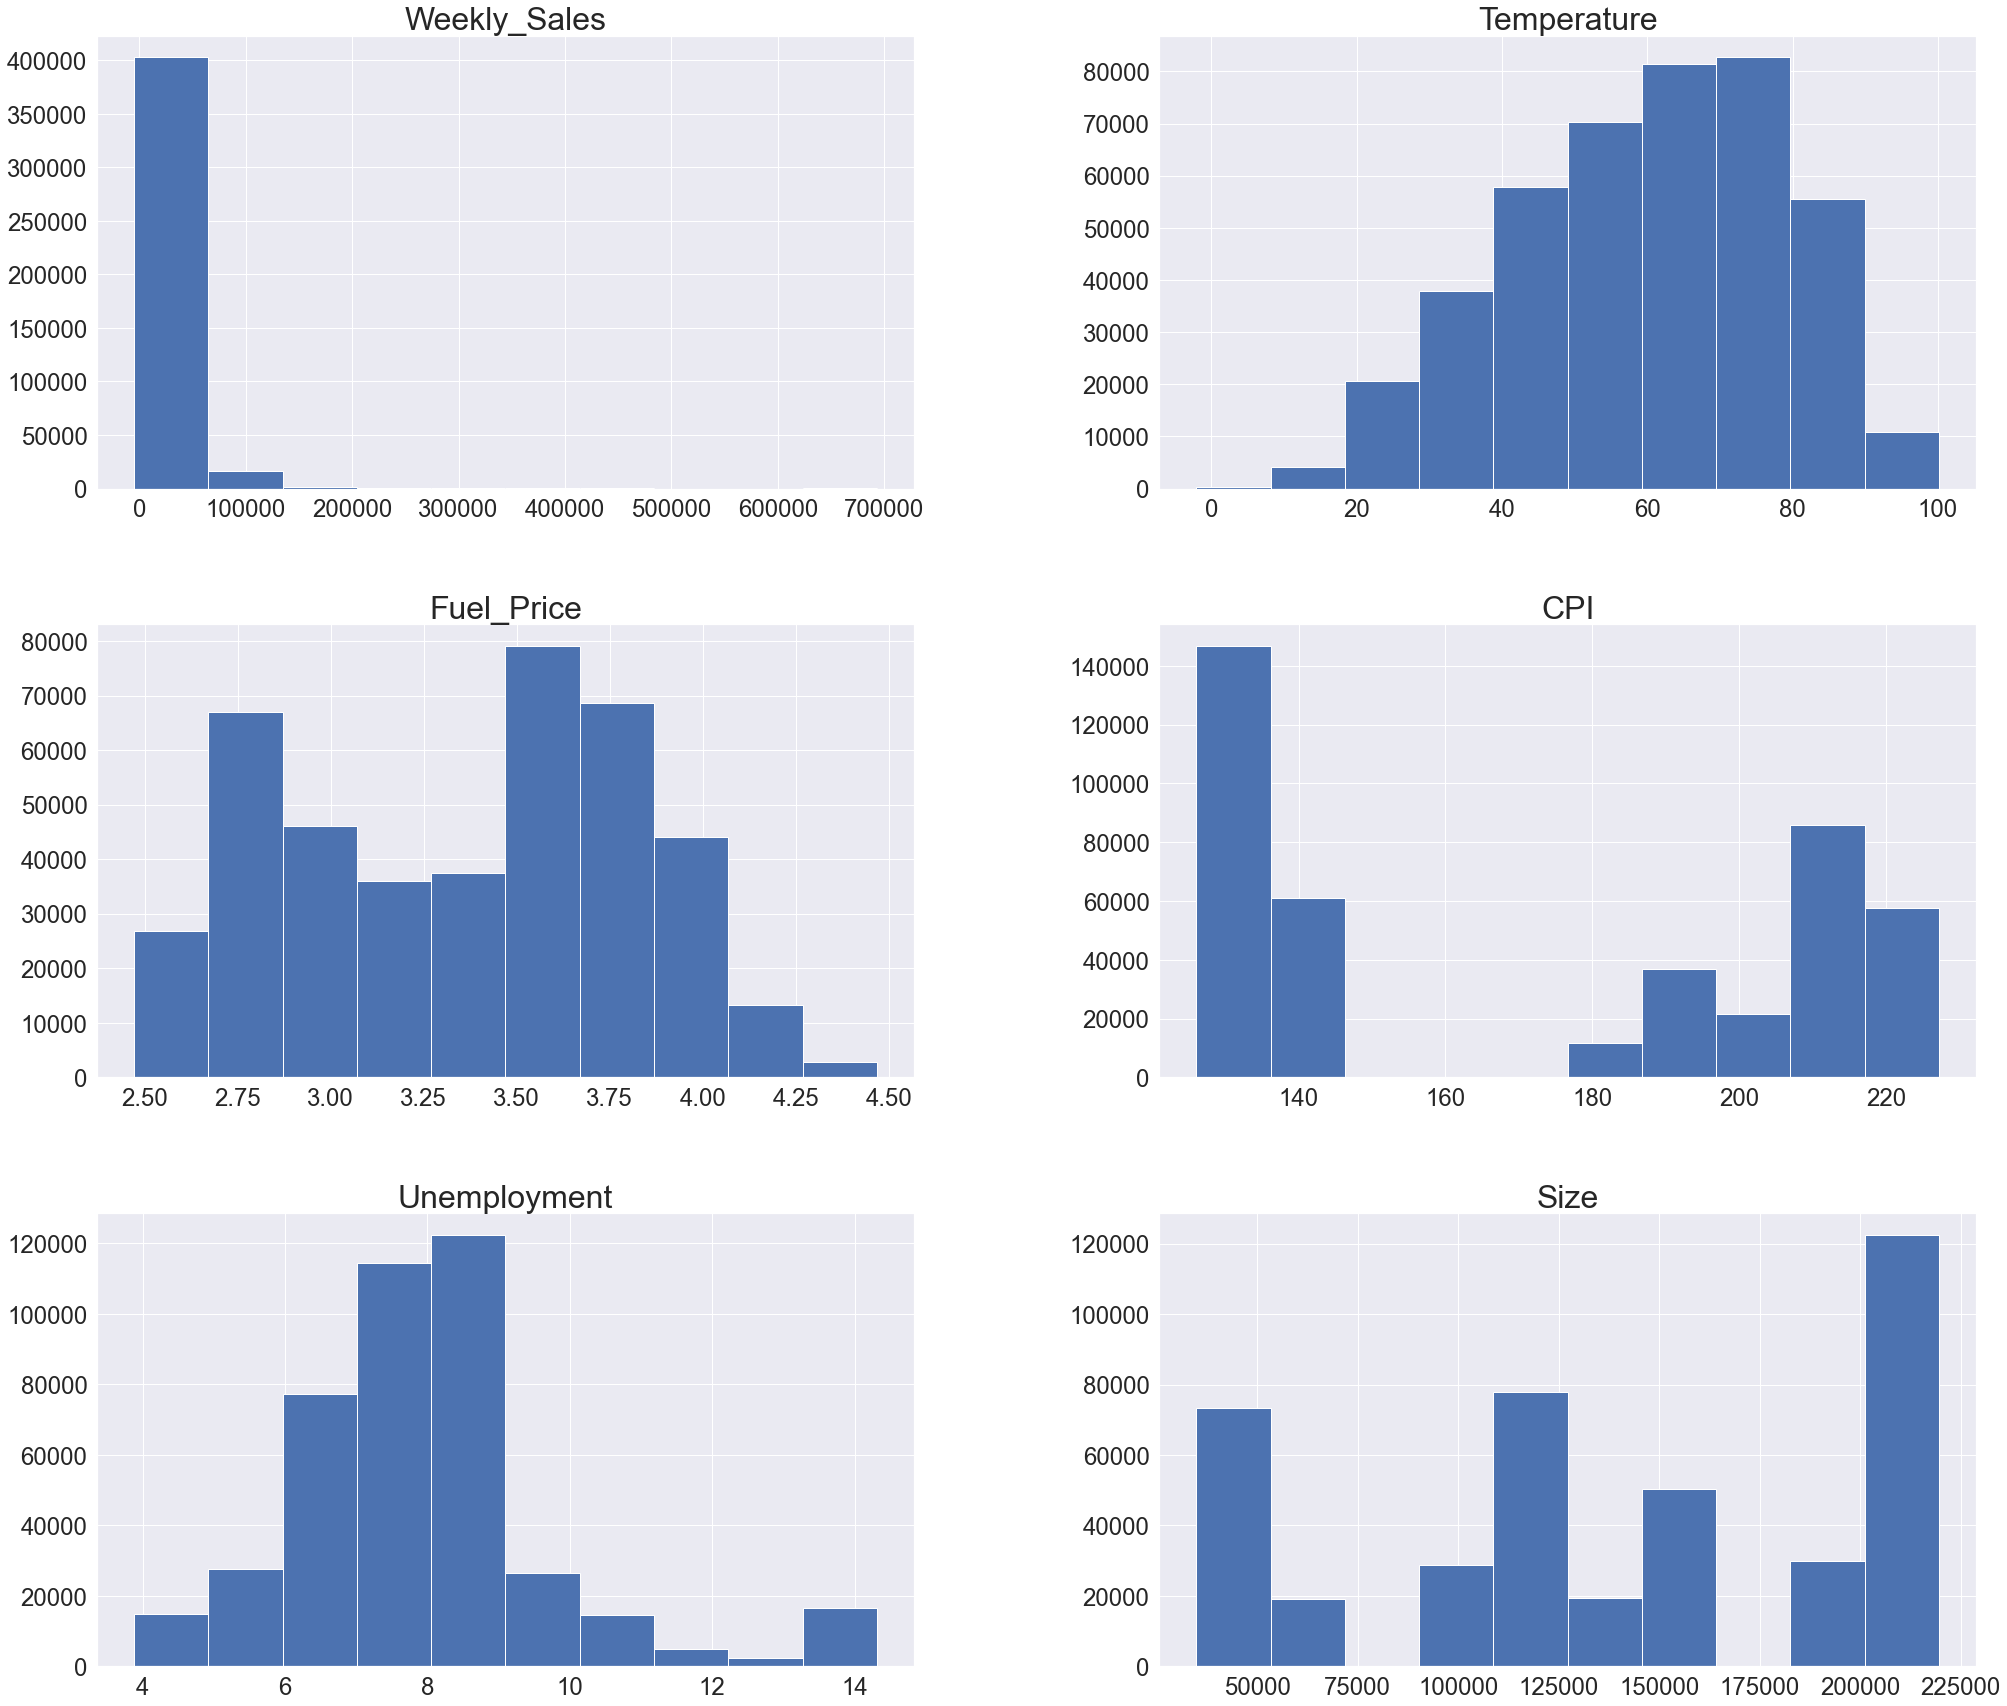

In [126]:
# Plot histograms
from matplotlib import rcParams
sns.set()
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
rcParams.update(params)
_ = df[['Weekly_Sales','Temperature','Fuel_Price','CPI', 'Unemployment', 'Size']].hist(figsize=(30, 30))